## **Предобработка данных. Категориальные признаки. Работа с текстами.**

Содержание семинара опирается на семинары, проводимые на ФКН. Во второй части работы отчасти использован туториал Kaggle по Word2Vec.

In [1]:
import numpy as np
import pandas as pd

В первой части семинара будем использовать немного видоизменённый для наших целей датасет https://archive.ics.uci.edu/ml/datasets/AutoUniv.

В нём присутствуют целочисленные, вещественнозначные и категориальные признаки.

In [2]:
df = pd.read_csv('table.csv')
df.head()

,Unnamed: 0,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att117,att118,att119,att120,att121,att122,att123,att124,att125,class
0,0,6.4,550,92.0,3.15,78.2,6040,1.53,83.7,dog,...,0.77,4753,904,0.93,2.9,v1,27.6,294,739,class4
1,1,3.1,542,70.2,4.04,79.1,6464,1.56,94.7,seal,...,0.45,6952,905,0.91,5.2,v1,28.5,660,705,class4
2,2,3.2,579,90.9,4.16,76.7,6395,7.27,84.4,seal,...,0.45,4664,897,0.84,1.1,v1,27.7,546,688,class1
3,3,3.1,609,78.2,3.02,78.6,5678,8.04,88.2,bird,...,0.56,4762,873,0.48,1.3,v2,27.7,646,783,class4
4,4,2.7,557,81.0,4.03,78.9,6508,9.00,84.5,cat,...,0.48,4649,822,0.86,1.2,v1,47.0,642,665,class1


**Преобразование категориальных признаков**

Рассмотрим несколько типов предобработки данных. Она важна для корректной работы различных методов машинного обучения, в особенности, для линейных. 

In [3]:
from sklearn import preprocessing

Если в наших данных присутствуют категориальные признаки, то есть текстовые или порядковые признаки - те признаки, к которым нельзя относиться как к числам, то для дальнейшей работы с такими данными надо преобразовать категориальные признаки в числа. 

Нельзя упускать из вида порядковые признаки. Например, если наши данные содержат в качестве столбца индекс местности, то алгоритм будет считать, что индекс 119331 > 119101, что для нас смысла не имеет. Мы хотим, чтобы различные индексы служили индикаторами различных географических областей. Для этого порядковые признаки также надо предобрабатывать и переводить в числовые.

Посмотрим, какие стоблцы нашей таблицы содержат категориальные признаки.

In [4]:
cat_features_mask = (df.dtypes == "object").values
cat_features_mask

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,  True], dtype=bool)

In [5]:
len(cat_features_mask[cat_features_mask==True])

25

**Перевод текстовых категориальных признаков в числа**

Переведем все нечисловые признаки в числовые (порядковые), а затем будем их кодировать различными способами.

In [6]:
label_enc = preprocessing.LabelEncoder()
for feature in df.columns[cat_features_mask]: 
    df[feature] = label_enc.fit_transform(df[feature])
df.head()

,Unnamed: 0,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att117,att118,att119,att120,att121,att122,att123,att124,att125,class
0,0,6.4,550,92.0,3.15,78.2,6040,1.53,83.7,2,...,0.77,4753,904,0.93,2.9,0,27.6,294,739,3
1,1,3.1,542,70.2,4.04,79.1,6464,1.56,94.7,6,...,0.45,6952,905,0.91,5.2,0,28.5,660,705,3
2,2,3.2,579,90.9,4.16,76.7,6395,7.27,84.4,6,...,0.45,4664,897,0.84,1.1,0,27.7,546,688,0
3,3,3.1,609,78.2,3.02,78.6,5678,8.04,88.2,0,...,0.56,4762,873,0.48,1.3,1,27.7,646,783,3
4,4,2.7,557,81.0,4.03,78.9,6508,9.00,84.5,1,...,0.48,4649,822,0.86,1.2,0,47.0,642,665,0


**OneHot-кодирование**

Пусть некоторый признак принимает значения из множества K. OneHotEncoder вместо одного признака создает K бинарных признаков - по одному на каждое возможное значение исходного признака.

In [7]:
enc = preprocessing.OneHotEncoder(sparse=False)
df_cat = enc.fit_transform(df[df.columns[cat_features_mask]])
df_cat = pd.DataFrame(data=df_cat)

In [8]:
print df_cat.shape
df_cat.head()

(500, 81)


,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


**Хэширование**

HashingVectorizer преобразовывает строку в числовой массив заданной длиной с помощью хэш-функции. В этом методе в качестве входных параметров мы задаем желаемое количество новых признаков, а также токенизатор - обработчик текста (в нём мы можем сделать любую удобную нам предобработку текста: удалить редкие слова, удалить знаки препинания, оставить только слова из определенного списка и т.д.). Токенизатор возвращает текст, разбитый на токены, т.е. на слова.

In [9]:
def my_tokenizer(s):
    return [elem for elem in s.split()]

Наиболее интересный для нас с точки зрения хэширования - столбец att9.

In [10]:
df = pd.read_csv('table.csv')

df['att9'].drop_duplicates()

0         dog
1        seal
3        bird
4         cat
5        fish
14        pig
19    dolphin
Name: att9, dtype: object

Для применения HashingVectorize выбираем из столбца все различные значения(слова) без повторений, обучаем HashingVectorizer на этих словах и применяем ко всему столбцу. В итоге мы получаем разреженную матрицу. С ней умеют работать многие алгоритмы машинного обучения, но при желании можем перевести ее в numpy array.

In [11]:
from sklearn.feature_extraction.text import HashingVectorizer

coder = HashingVectorizer(tokenizer=my_tokenizer, n_features=15)

TrainNotDuble = df['att9'].drop_duplicates()
coder.fit(TrainNotDuble)

coder.transform(df['att9'].values).toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

**Заполнение пропусков**

В исходных данных могут быть пропущенные значения. Большинство методов машинного обучения не умеют с ними работать. Для этого мы должны каким-нибудь образом заполнить эти пропуски.

Способы заполнения пропусков:

* средним значением 
* медианой
* самым часто встречающимся значением
* каким-то одним новым значением (иногда пропуск в данных можно воспринимать как еще одно категориальное значение).
* можно взять часть данных для обучения, а на другой части данных предсказать пропущенные значения (тогда для решения основной задачи нельзя обучаться на первой части данных)

Посмотрим, есть ли пропуски в наших данных и много ли их.

In [12]:
#индексы строк с NAN

df_real = df[df.columns[~cat_features_mask]]

print np.any(np.isnan(df_real))

pd.isnull(df_real).any(1).nonzero()[0]

True


array([  5,  14,  25,  26,  27,  66,  67,  69,  74,  83,  92,  99, 110,
       123, 124, 125, 343, 344, 345, 348, 352, 362], dtype=int64)

Заполним пропуски в данных с помощью встроенного метода Imputer, используя среднее значение признака.

In [13]:
mis_replacer = preprocessing.Imputer(strategy="mean")
df_no_mis = pd.DataFrame(data=mis_replacer.fit_transform(df_real))

In [14]:
np.any(np.isnan(df_no_mis))

False

**Масштабирование признаков**

Для применения в особенности линейных методов машинного обучения масштабирование признаков очень важно. Может быть так, что метод даст совершенно неправильный результат без масштабирования.

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (StandardScaler в sklearn)
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака (MinMaxScaler в sklearn)

In [15]:
normalizer = preprocessing.StandardScaler()
df_real_norm = normalizer.fit_transform(df_no_mis)
df_real_norm_pd = pd.DataFrame(data=df_real_norm)

In [16]:
mm_scaler = preprocessing.MinMaxScaler()
df_mm_scaled = mm_scaler.fit_transform(df_no_mis)
df_mm_scaled_pd = pd.DataFrame(data=df_mm_scaled)

Разберем пример данных, когда масштабирование признаков сильно влияет на результат работы алгоритмов машинного обучения. Рассмотрим точки, равномерно нанесенные на плоскость (в данном датасете в качестве признаков x и y выступают координаты - долгота и широта точек, все точки территориально находятся в Москве).

In [17]:
X = pd.read_csv('scaler_example.csv')
X.head()

,Unnamed: 0,lat,lon,class
0,0,55.718427,37.572628,1
1,1,55.718749,37.573061,1
2,2,55.719072,37.573495,1
3,3,55.719394,37.573928,1
4,4,55.719717,37.574361,1


Посмотрим, как выглядят точки из датасета. Точки относятся к двум классам.

Populating the interactive namespace from numpy and matplotlib


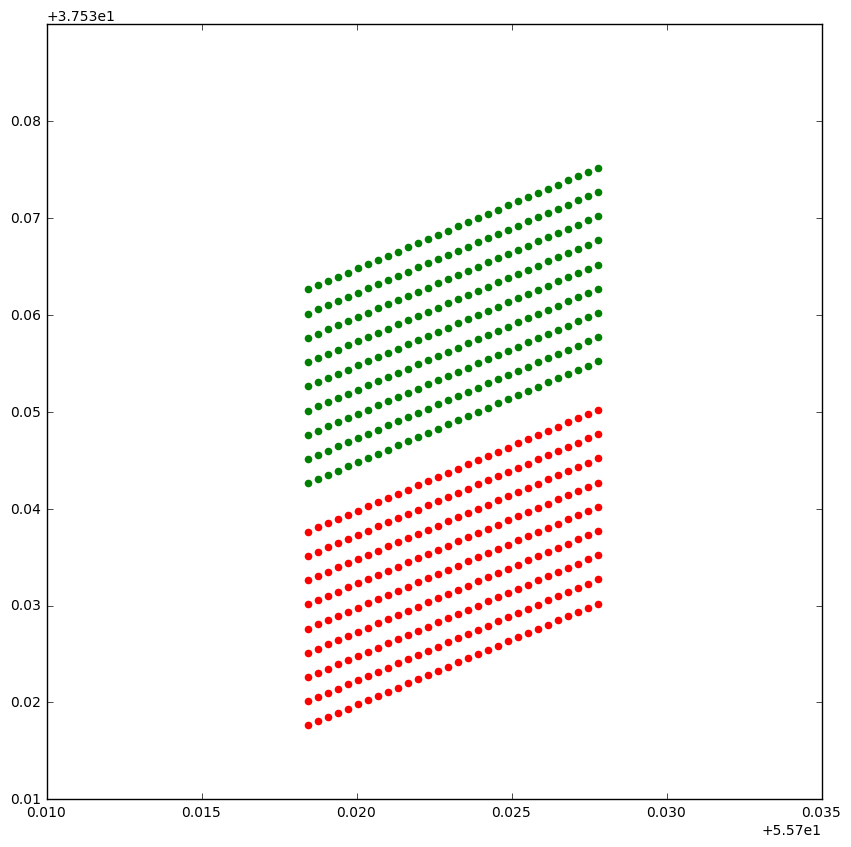

In [18]:
%pylab inline

Xtrain = X[['lat','lon']].values
Ytrain = X['class'].values

figure(figsize=(10,10))
scatter(Xtrain[Ytrain==1][:,0],Xtrain[Ytrain==1][:,1],color='green')
scatter(Xtrain[Ytrain==0][:,0],Xtrain[Ytrain==0][:,1],color='red')

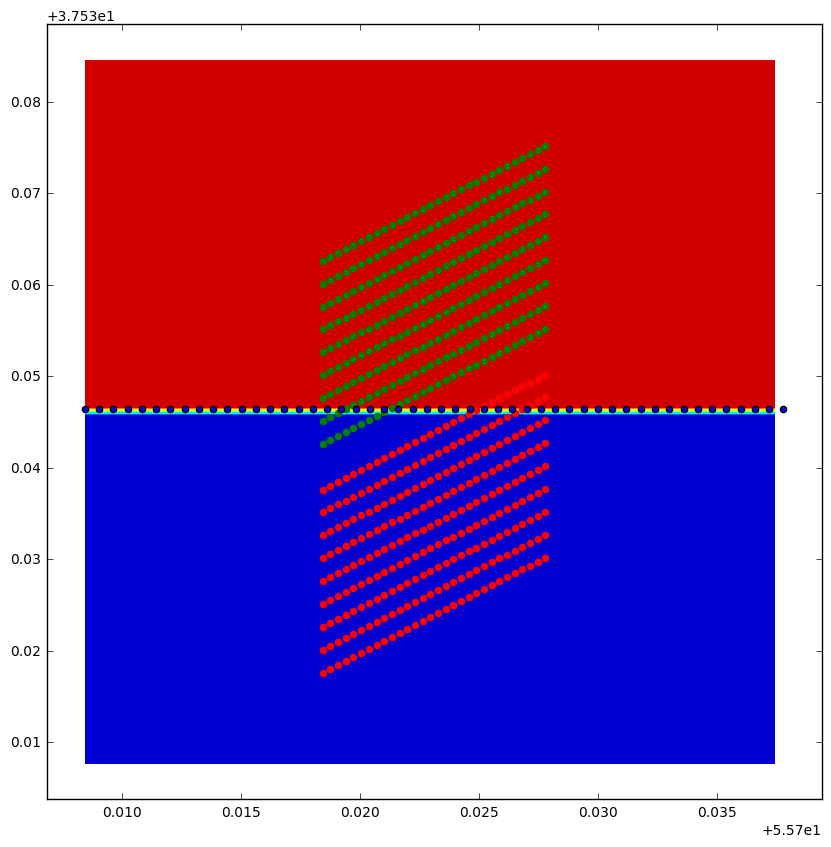

In [19]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(Xtrain,Ytrain)

def plot_decision_line(Xtrain, Ytrain, clf, h):

    x_min, x_max = Xtrain[:,0].min()-0.01, Xtrain[:,0].max()+0.01
    y_min, y_max = Xtrain[:,1].min()-0.01, Xtrain[:,1].max()+0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.contourf(xx, yy, Z)

    Ytrain = np.array(Ytrain)
    plt.scatter(Xtrain[Ytrain==1][:,0],Xtrain[Ytrain==1][:,1],color='green')
    plt.scatter(Xtrain[Ytrain==0][:,0],Xtrain[Ytrain==0][:,1],color='red')

    a = clf.coef_[0][0]
    b = clf.coef_[0][1]
    c = clf.intercept_

    K = -a*1./b
    B = -c*1./b

    xx0 = np.linspace(x_min, x_max)
    yy0 = K * xx0 + B

    plt.scatter(xx0,yy0)
    plt.show()
    
plot_decision_line(Xtrain, Ytrain, clf, 0.001)

   Мы видим, что SVM абсолютно не справился с задачей. Попробуем теперь масштабировать данные.

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
TrainScaled = sc.fit_transform(Xtrain)

clf.fit(TrainScaled,Ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

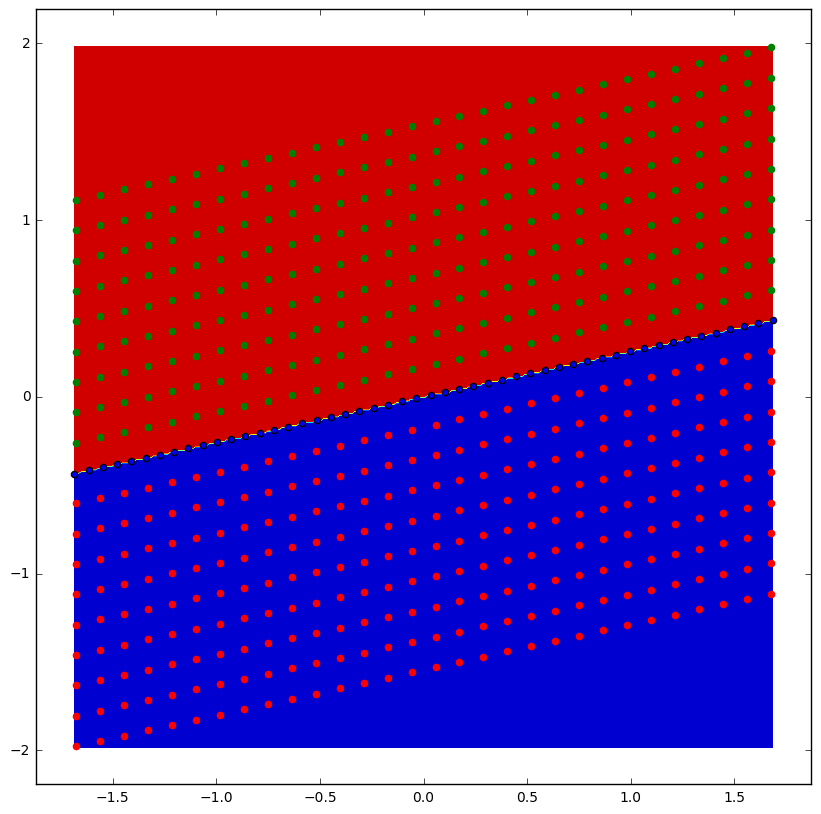

In [21]:
plot_decision_line(TrainScaled, Ytrain, clf, 0.01)

## **Работа с текстовыми признаками**

In [22]:
from tqdm import tqdm
import regex as re

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Program Files\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Одним из направлений машинного обучения является работа с текстами и извлечение полезной информации из текстов. Чтобы алгоритмы машинного обучения могли работать с текстами, необходимо перевести тексты в наборы чисел. Для этого применяют различные алгоритмы векторизации текстов. 

Будем изучать датасет, содержащий отзывы о фильмах. Отзывы могут быть положительные, либо отрицательные. Наша конечная задача - научиться различать положительные и отрицательные отзывы.

Загрузим датасет и уберем из него плохие строки (в которых нет оценки фильму).

In [97]:
responses = []
X = []
y = []
import codecs 

bad = 0
with codecs.open('imdb_labelled.txt',encoding='utf-8') as thefile:
    for row in tqdm(thefile.readlines()):
        try:
            resp_curr, y_curr = row.split('\t')
        except:
            'ValueError'
            print row
            bad+=1
        X.append(resp_curr)
        y.append(int(y_curr))
bad

100%|██████████| 1002/1002 [00:00<00:00, 417472.20it/s]

The script is
Definitely worth seeing


2

In [98]:
bad_responses = filter(lambda r: 'awful' in r, X)
print bad_responses[1]

And the rest of it just sits there being awful... with soldiers singing songs about the masculinity they pledge themselves to, hairsplitting about purity, the admiration of swords, etc.  


Первые этапы обработки текста:

* снижение регистра

* удаление пунктуации

* удаление всех символов, кроме символов нашего алфавита (в данном случае, латинского)

In [99]:
print re.sub(ur'[^\p{Latin}]', ' ', bad_responses[1].lower())

and the rest of it just sits there being awful    with soldiers singing songs about the masculinity they pledge themselves to  hairsplitting about purity  the admiration of swords  etc   


In [100]:
Texts = map(lambda r: re.sub(ur'[^\p{Latin}]', ' ', r.lower()), X)
Texts[35]

u'as they say in canada  this is the fun game  aye   '

Посмотрим на распределение ответов в наших данных. 

(array([ 501.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  501.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

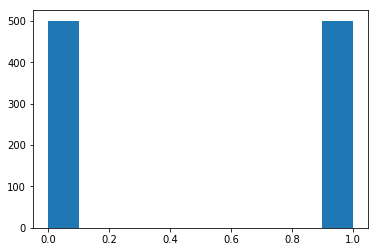

In [101]:
hist(y)

**1 способ векторизации: счётчик (CountVectorizer)**

Каждому слову соответствует количество его вхождений в текст.

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
vectorizer = CountVectorizer(encoding='utf8', min_df=5)
_ = vectorizer.fit(Texts)

In [104]:
vectorizer.transform(Texts[:1])

<1x392 sparse matrix of type '<type 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [107]:
print vectorizer.transform(Texts[:1]).indptr
print vectorizer.transform(Texts[:1]).indices
print vectorizer.transform(Texts[:1]).data

[0 5]
[  0 203 215 297 352]
[1 1 1 1 3]


In [106]:
from IPython.display import display, Math, Latex

**2 способ векторизации: TF-IDF**

Ещё один способ работы с текстовыми данными — TF-IDF (Term Frequency–Inverse Document Frequency). Рассмотрим коллекцию текстов $D$. Для каждого уникального слова $t$ из документа $d \in D$ вычислим следующие величины:

1. Term Frequency – количество вхождений слова в отношении к общему числу слов в тексте: 
    $$\text{tf}(t, d) = \frac{n_{td}}{\sum_{t \in d} n_{td}},$$ где $n_{td}$ — количество вхождений слова $t$ в текст $d$.
2. Inverse Document Frequency $$\text{idf}(t, D) = \log \frac{\left| D \right|}{\left| \{d\in D: t \in d\} \right|},$$ где $\left| \{d\in D: t \in d\} \right|$ – количество текстов в коллекции, содержащих слово $t$.

Тогда для каждой пары (слово, текст) $(t, d)$ вычислим величину: $$\text{tf-idf}(t,d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D).$$

Отметим, что значение $\text{tf}(t, d)$ корректируется для часто встречающихся общеупотребимых слов при помощи значения $\text{idf}(t, D).$

Признаковым описанием одного объекта $d \in D$ будет вектор $\bigg(\text{tf-idf}(t,d, D)\bigg)_{t\in V}$, где $V$ – словарь всех слов, встречающихся в коллекции $D$.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer(encoding='utf8', min_df=5)
_ = vectorizer.fit(Texts)

In [19]:
vectorizer.transform(Texts[:1])

<1x392 sparse matrix of type '<type 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [20]:
print vectorizer.transform(Texts[:1]).indptr
print vectorizer.transform(Texts[:1]).indices
print vectorizer.transform(Texts[:1]).data

[0 5]
[352 297 215 203   0]
[ 0.77413499  0.40154229  0.18562717  0.35986969  0.27480023]


Применим два рассмотренных метода векторизации к задаче классификации отзывов на два класса (положительные и отрицательные).

In [21]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

In [30]:
vectorizer = CountVectorizer(encoding='utf8', min_df=5)
_ = vectorizer.fit(Texts)

X = vectorizer.transform(Texts)
y = np.array(y)

cv = ShuffleSplit(X.shape[0], n_iter=1, test_size=0.2)

for train_ids, test_ids in cv:
    lr = LogisticRegression()
    lr.fit(X[train_ids], y[train_ids])
    preds = lr.predict_proba(X[test_ids])[:,1]
    print 'ROC-AUC: %.3f, ACC: %.3f' % (roc_auc_score(y[test_ids], preds), 
                                        accuracy_score(y[test_ids], (preds > 0.5).astype(int)))

ROC-AUC: 0.834, ACC: 0.746


In [31]:
vectorizer = TfidfVectorizer(encoding='utf8', min_df=5)
_ = vectorizer.fit(Texts)

X = vectorizer.transform(Texts)
y = np.array(y)

for train_ids, test_ids in cv:
    lr = LogisticRegression()
    lr.fit(X[train_ids], y[train_ids])
    preds = lr.predict_proba(X[test_ids])[:,1]
    print 'ROC-AUC: %.3f, ACC: %.3f' % (roc_auc_score(y[test_ids], preds), 
                                        accuracy_score(y[test_ids], (preds > 0.5).astype(int)))

ROC-AUC: 0.879, ACC: 0.771


**Важность признаков**

В задачах, связанных с обработкой текстов, признаки как правило хорошо интерпретируемы. Для визуального контроля качества работы алгоритма можно посмотреть на те слова, которые алгоритм посчитал наиболее важными для данной задачи.

In [33]:
weights = zip(vectorizer.get_feature_names(), lr.coef_[0])
weights = sorted(weights, key=lambda i: i[1])
for i in range(1,20):
    print '%s, %.2f' % f_weights[-i]
    
print '...'
for i in reversed(range(1,20)):
    print '%s, %.2f' % f_weights[i]

great, 1.87
film, 1.59
wonderful, 1.56
love, 1.49
and, 1.42
excellent, 1.24
loved, 1.22
liked, 1.22
beautiful, 1.18
funny, 1.17
game, 1.17
right, 1.16
well, 1.03
nice, 1.02
played, 1.01
good, 0.97
best, 0.95
performance, 0.92
enjoyed, 0.91
...
any, -0.89
poor, -0.93
worst, -0.95
boring, -0.96
how, -0.99
terrible, -1.00
script, -1.03
waste, -1.05
cheap, -1.05
sucked, -1.07
make, -1.08
just, -1.09
even, -1.14
plot, -1.23
didn, -1.25
not, -1.31
stupid, -1.36
no, -1.42
awful, -1.48


**3 способ векторизации: Word2Vec**

Word2Vec - это алгоритм, который собирает статистику по совместному появлению слов в фразах, а затем с помощью нейронных сетей решает задачу снижения размерности и выдает на выходе компактные векторные представления слов, в максимальной степени отражающие отношения этих слов в обрабатываемых текстах.

Нахождение связей между контекстами слов основано на предположении, что слова, находящиеся в похожих контекстах, имеют тенденцию значить похожие вещи, т.е. быть семантически близкими. 
Формально задача стоит так: максимизировать косинусное расстояние между векторами слов (скалярное произведение векторов), которые появляются рядом друг с другом, и минимизировать косинусное расстояние между векторами слов, которые не появляются друг рядом с другом. Рядом друг с другом в данном случае значит в близких контекстах.

Применим векторизацию с помощью word2vec для наших данных. Кроме того, удалим stop-слова, то есть слова, часто встречающиеся во всех английских текстах - это ещё один полезный метод обработки текстов.

In [37]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))
stops

{u'a',
 u'about',
 u'above',
 u'after',
 u'again',
 u'against',
 u'ain',
 u'all',
 u'am',
 u'an',
 u'and',
 u'any',
 u'are',
 u'aren',
 u'as',
 u'at',
 u'be',
 u'because',
 u'been',
 u'before',
 u'being',
 u'below',
 u'between',
 u'both',
 u'but',
 u'by',
 u'can',
 u'couldn',
 u'd',
 u'did',
 u'didn',
 u'do',
 u'does',
 u'doesn',
 u'doing',
 u'don',
 u'down',
 u'during',
 u'each',
 u'few',
 u'for',
 u'from',
 u'further',
 u'had',
 u'hadn',
 u'has',
 u'hasn',
 u'have',
 u'haven',
 u'having',
 u'he',
 u'her',
 u'here',
 u'hers',
 u'herself',
 u'him',
 u'himself',
 u'his',
 u'how',
 u'i',
 u'if',
 u'in',
 u'into',
 u'is',
 u'isn',
 u'it',
 u'its',
 u'itself',
 u'just',
 u'll',
 u'm',
 u'ma',
 u'me',
 u'mightn',
 u'more',
 u'most',
 u'mustn',
 u'my',
 u'myself',
 u'needn',
 u'no',
 u'nor',
 u'not',
 u'now',
 u'o',
 u'of',
 u'off',
 u'on',
 u'once',
 u'only',
 u'or',
 u'other',
 u'our',
 u'ours',
 u'ourselves',
 u'out',
 u'over',
 u'own',
 u're',
 u's',
 u'same',
 u'shan',
 u'she',
 u'shoul

In [41]:
def delete_stopwords(review, remove_stopwords=True):
    
    words = review.split()

    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return(words)

Переведем строки нашего датасета в токенизированный вид и удалим из них стоп-слова - в этом виде они пригодны для использования word2vec.

In [43]:
import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def review_to_sentences(review,tokenizer,remove_stopwords=True ):

    raw_sentences = tokenizer.tokenize(review.strip())

    sentences = []
    for sentence in raw_sentences:
        if len(sentence) > 0:
            sentences.append(delete_stopwords(sentence,remove_stopwords))
    return sentences

sentences = []
Y = []
for i in range(len(Texts)):
    if len(set(Texts[i])) == 1:
        continue
    Y.append(y[i])
    sentences += review_to_sentences(Texts[i], tokenizer)

Применим word2vec к токенизированному корпусу.

In [44]:
num_features = 500                       
min_word_count = 5                   
num_workers = 4       
context = 10                                                                               
downsampling = 1e-5   

from gensim.models import word2vec


model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

model.init_sims(replace=True)

model_name = str(num_features)+"features_word2vec"
model.save(model_name)

Теперь каждое слово корпуса имеет векторное представление

In [46]:
model.wv['good']

array([-0.01643586,  0.05379697,  0.01463854, -0.01274379, -0.05882576,
        0.04192226, -0.05076824, -0.06632231,  0.05484292, -0.00985162,
        0.04459245,  0.06577962, -0.00052611,  0.00023736, -0.06920638,
       -0.03122957, -0.03049195,  0.05123437,  0.01829705,  0.0548411 ,
        0.0491547 , -0.0712584 ,  0.07114273,  0.0416788 , -0.06600374,
        0.06936676,  0.00473274, -0.02131033, -0.05746994,  0.00030344,
       -0.03593435, -0.05889384,  0.02758963,  0.03043418,  0.0505714 ,
        0.01325307,  0.02466158, -0.05069513, -0.0441882 , -0.04104777,
        0.00533597, -0.063242  , -0.05276113,  0.05147021,  0.05085199,
       -0.0665969 ,  0.02247656,  0.07164661, -0.03551215, -0.03772375,
        0.02579116,  0.04995889, -0.00421592,  0.07560738,  0.03875414,
        0.02723952,  0.00641359, -0.01965233,  0.02169894,  0.00340134,
       -0.01994597, -0.00984615, -0.01057374, -0.07337175,  0.03579481,
       -0.00059824,  0.0645955 , -0.02766181,  0.03132612, -0.07

В качестве одного из способов векторизовать текст (в нашем случае отзыв на фильм), можно усреднить векторы слов, входящих в этот текст. Так и сделаем.

In [48]:
import numpy as np
import re
from nltk.corpus import stopwords

index2word_set = set(model.wv.index2word)

def make_featurevec(words, model, num_features):
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec += model[word]
    if nwords > 0:
        featureVec = np.divide(featureVec,nwords)
    return featureVec

def get_avg_featurevecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = make_featurevec(review, model, num_features)
        counter = counter + 1
    return reviewFeatureVecs

trainDataVecs = get_avg_featurevecs(sentences, model, num_features)

Наконец, обучим классификатор на полученных признаках.

In [57]:
cv = ShuffleSplit(trainDataVecs.shape[0], n_iter=1, test_size=0.2)

Y = np.array(Y)

for train_ids, test_ids in cv:
    lr = LogisticRegression()
    lr.fit(trainDataVecs[train_ids], Y[train_ids])
    preds = lr.predict_proba(trainDataVecs[test_ids])[:,1]
    print 'ROC-AUC: %.3f, ACC: %.3f' % (roc_auc_score(Y[test_ids], preds), 
                                        accuracy_score(Y[test_ids], (preds > 0.5).astype(int)))

ROC-AUC: 0.806, ACC: 0.745
